# 🎂 Dockship Challenge : Prediction of Fare price of Cabs🎂

## TO DO:

> Predict the cab fare price. The aim of the challenge is to predict the cab fare using the given dataset. 

## Data:
> Dataset Given

The dataset consists of 3 CSV files:

* TRAIN.csv : (./dataset/TRAIN.csv)
* TEST.csv: (./dataset/TEST.csv)
* sample_submission.csv

## Evaluate:
* Root Mean Squared Error (RMSE) will be used for evaluation.
* If the scores are tied, the person reaching the score FIRST will get the better rank.

## Features:
> From Test data

TEST.csv consists of the testing data required for prediction and consists of 8 attributes:

* index
* time_stamp - epoch time (in seconds) when the cab was booked
* cab_provider - company (Uber/Lyft)
* source - the starting point of the cab ride
* destination - the destination of the cab ride
* distance - the distance between source and destination
* surge_multiplier - multiplier by which price increased
* cab_type - the type of cab (Uber Pool, Uber XL, etc. )

## 🎇 Imports

In [1]:
# Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Models and processing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Model Save
import pickle

## 🤳 Data Load

In [40]:
# Test data
def load_data(x='TRAIN'):
    df = pd.read_csv('data/'+x+'.csv')
    return df

In [41]:
test = 'test'
cab = load_data() # Add test as parameter for test data

## 🎊 EDA 🎊

In [42]:
cab.head(2).T

,0,1
index,0,1
time_stamp,1543203646318,1543203646319
cab_provider,Lyft,Uber
source,Boston University,South Station
destination,Theatre District,Theatre District
distance,3.03,1.3
surge_multiplier,1,1
cab_type,Lux Black XL,Black
fare,34,18.5


In [43]:
# 1. Drop Index
cab.drop('index', inplace=True, axis=1)

In [44]:
cab.isna().count()

time_stamp          100000
cab_provider        100000
source              100000
destination         100000
distance            100000
surge_multiplier    100000
cab_type            100000
fare                100000
dtype: int64

In [111]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_stamp        100000 non-null  int64  
 1   cab_provider      100000 non-null  object 
 2   source            100000 non-null  object 
 3   destination       100000 non-null  object 
 4   distance          100000 non-null  float64
 5   surge_multiplier  100000 non-null  float64
 6   cab_type          100000 non-null  object 
 7   fare              100000 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.1+ MB


In [45]:
# 2. Convert Unix timestamp to datetime
cab['date'] = pd.to_datetime(cab['time_stamp'], unit='ms') #(D,s,ms,us,ns)

In [83]:
cab.head()

,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,date
0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0,2018-11-26 03:40:46.318
1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5,2018-11-26 03:40:46.319
2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5,2018-11-26 03:40:46.320
3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5,2018-11-26 03:40:46.320
4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0,2018-11-26 03:40:46.320


In [84]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   time_stamp        100000 non-null  int64         
 1   cab_provider      100000 non-null  object        
 2   source            100000 non-null  object        
 3   destination       100000 non-null  object        
 4   distance          100000 non-null  float64       
 5   surge_multiplier  100000 non-null  float64       
 6   cab_type          100000 non-null  object        
 7   fare              100000 non-null  float64       
 8   date              100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.9+ MB


In [85]:
cab.duplicated().sum()

15

In [7]:
# For train3. Drop Duplicates
cab.drop_duplicates(inplace=True)

In [96]:
len(cab.date.unique())

17958

In [101]:
dir(pd.DatetimeIndex)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__inv__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_accessors',
 '_add_comparison_methods',
 '_add_logical_methods',
 '_add_logical_methods_disa

In [ ]:
'''
date,day,dayofweek,minute,second,time,weekday
'''

In [46]:
# 3. Add hr,min,second
cab['hour'] = pd.DatetimeIndex(cab['date']).hour
cab['min'] = pd.DatetimeIndex(cab['date']).minute
cab['second'] = pd.DatetimeIndex(cab['date']).second

In [9]:
cab.head()

,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,date,hour,min,second
0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0,2018-11-26 03:40:46.318,3,40,46
1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5,2018-11-26 03:40:46.319,3,40,46
2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5,2018-11-26 03:40:46.320,3,40,46
3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5,2018-11-26 03:40:46.320,3,40,46
4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0,2018-11-26 03:40:46.320,3,40,46


In [118]:
cab.head()

,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,date,hour,min,second
0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0,2018-11-26 03:40:46.318,3,40,46
1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5,2018-11-26 03:40:46.319,3,40,46
2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5,2018-11-26 03:40:46.320,3,40,46
3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5,2018-11-26 03:40:46.320,3,40,46
4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0,2018-11-26 03:40:46.320,3,40,46


In [119]:
cab['second'].unique()

array([46, 47, 55, 56, 57, 36, 37, 38, 18, 19, 20, 39, 40, 44, 45,  0,  1,
        2,  5,  6,  7,  8, 16, 17, 25, 26, 27, 28,  3, 15,  4, 32, 33, 30,
       31, 34, 52, 53, 54, 22, 23, 24, 58, 21, 12, 13, 35, 10, 11, 14,  9,
       43, 29, 41, 42, 48, 49, 50], dtype=int64)

In [47]:
df = cab.copy()

In [48]:
# 4. Drop Date,time_stamp, source, destination

columns_to_drop = ['time_stamp', 'source', 'destination', 'date']
for col in columns_to_drop:
    cab.drop(col, inplace=True, axis=1)

In [11]:
cab.head()

,cab_provider,distance,surge_multiplier,cab_type,fare,hour,min,second
0,Lyft,3.03,1.0,Lux Black XL,34.0,3,40,46
1,Uber,1.30,1.0,Black,18.5,3,40,46
2,Uber,2.71,1.0,UberX,19.5,3,40,46
3,Lyft,2.43,1.0,Lyft,10.5,3,40,46
4,Uber,2.71,1.0,UberXL,32.0,3,40,46


In [49]:
# 5. Applying one-hot-encoding
cab = pd.get_dummies(cab, columns=['cab_provider','cab_type'], drop_first=False)

In [15]:
cab.hour.unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23,  0,  1,  2], dtype=int64)

In [50]:
df.head()

,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,date,hour,min,second
0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0,2018-11-26 03:40:46.318,3,40,46
1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5,2018-11-26 03:40:46.319,3,40,46
2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5,2018-11-26 03:40:46.320,3,40,46
3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5,2018-11-26 03:40:46.320,3,40,46
4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0,2018-11-26 03:40:46.320,3,40,46


## EDA

EDA options:
1. Fares by the hr
2. Total fare amount w.r.t each cab type
3. Distance and fare price

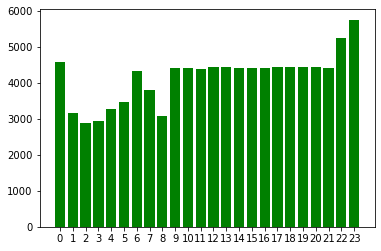

In [38]:
plt.bar(list(cab.hour.value_counts().keys()),list(cab.hour.value_counts()), color="green")
# plt.yticks([0]+list(cab.hour.value_counts()[:5]))
plt.xticks(np.arange(0,24))
plt.show();

In [33]:
cab.hour.value_counts()[0:5]

23    5753
22    5253
0     4580
17    4447
19    4440
Name: hour, dtype: int64

In [51]:
cab_fare = df[['cab_type','fare']]

In [53]:
cab_fare=cab_fare.sort_values(by=['fare'], ascending=False)

KeyboardInterrupt: 

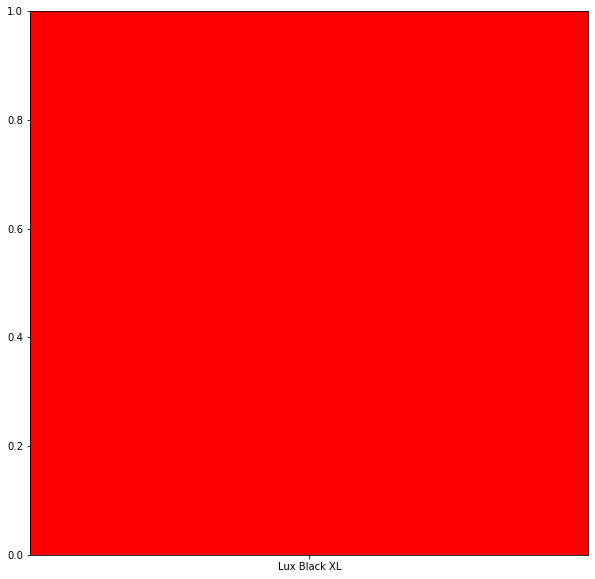

In [56]:
plt.figure(figsize=(10,10))
plt.bar(list(cab_fare['cab_type']),
        list(cab_fare['fare']),
        color="red")
plt.show()

In [60]:
df_cross = pd.crosstab(df['cab_type'],df['fare'])

<AxesSubplot:xlabel='cab_type'>

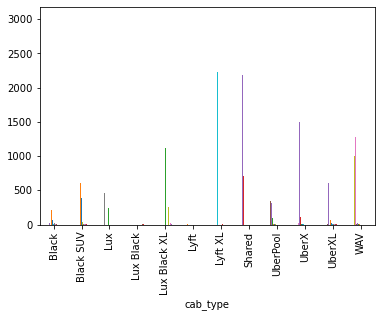

In [68]:
pd.crosstab(df['cab_type'],df['fare']).plot.bar(legend=False)

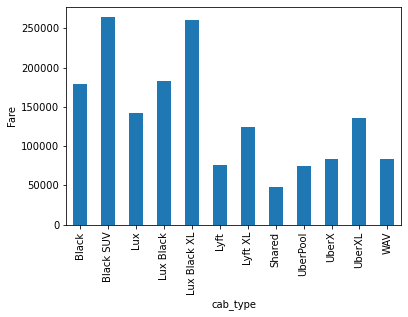

In [80]:
# Total fare amount w.r.t each cab type
df.fare.groupby(df["cab_type"]).sum().plot.bar(ylabel="Fare");

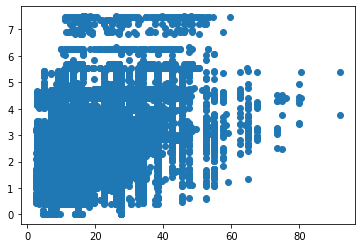

In [82]:
plt.scatter(x=df['fare'],y=df['distance'])
plt.show()

In [116]:
pd.crosstab(df['source'],df['destination'])

destination,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End
source,,,,,,,,,,,,
Back Bay,0,0,1350,1397,0,1386,1530,0,1439,1273,0,0
Beacon Hill,0,0,1359,1272,0,1429,1493,0,1346,1378,0,0
Boston University,1373,1235,0,0,1473,0,0,1322,0,0,1364,1464
Fenway,1358,1255,0,0,1384,0,0,1459,0,0,1367,1454
Financial District,0,0,1436,1440,0,1361,1396,0,1438,1469,0,0
Haymarket Square,1365,1315,0,0,1529,0,0,1556,0,0,1342,1230
North End,1632,1592,0,0,1281,0,0,1325,0,0,1432,1375
North Station,0,0,1295,1350,0,1270,1334,0,1333,1351,0,0
Northeastern University,1410,1274,0,0,1371,0,0,1386,0,0,1457,1435


## 🙌 Modelling

In [128]:
# Split train, test
X = cab.drop('fare', axis=1)
y = cab['fare']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [145]:
RFR = RandomForestRegressor(random_state=42,max_depth=20,
                               max_features='auto',
                               min_samples_leaf=2,
                               min_samples_split=50,
                               n_estimators=300,verbose=2)
RFR.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   44.1s finished


RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=50,
                      n_estimators=300, random_state=42, verbose=2)

In [146]:
RFR.score(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.8s finished


0.9681165827221123

In [147]:
RFR.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished


0.96262478886532

In [161]:
cab.head().T

,0,1,2,3,4
distance,0.59,0.59,6.83,1.35,0.59
surge_multiplier,1.00,1.00,1.00,1.00,1.00
hour,0.00,0.00,0.00,0.00,0.00
min,15.00,15.00,15.00,15.00,15.00
second,24.00,24.00,24.00,24.00,24.00
cab_provider_Uber,0.00,0.00,1.00,1.00,0.00
cab_type_Black,0.00,0.00,0.00,0.00,0.00
cab_type_Black SUV,0.00,0.00,0.00,0.00,0.00
cab_type_Lux,1.00,0.00,0.00,0.00,0.00
cab_type_Lux Black,0.00,0.00,0.00,0.00,0.00


In [164]:
y_pred = RFR.predict(cab)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished


In [165]:
df_results = pd.DataFrame(y_pred, index = None)
#Remove all negative
df_results[df_results < 0] = 0
df_results["index"]=range(0, len(df_results))
df_results.columns=["fare","index"]

columns_titles = ["index","fare"]
df_results=df_results.reindex(columns=columns_titles)
# #Apply Up on the Sales column
# df_results['fare'] = df_results['fare'].apply(lambda x: np.round(x,1))
print(df_results.info())
print(df_results.head())
df_results.to_csv("output.csv", index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   25000 non-null  int32  
 1   fare    25000 non-null  float64
dtypes: float64(1), int32(1)
memory usage: 293.1 KB
None
   index  fare
0      0  10.7
1      1  26.9
2      2  18.4
3      3  13.0
4      4  10.1
